In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
from sympy import Matrix, tanh, exp
from sympy.abc import x, y
from sympy import symbols
#from utils import newtons_method
from smt.sampling_methods import LHS
import random

## Dynamics of ssRNN

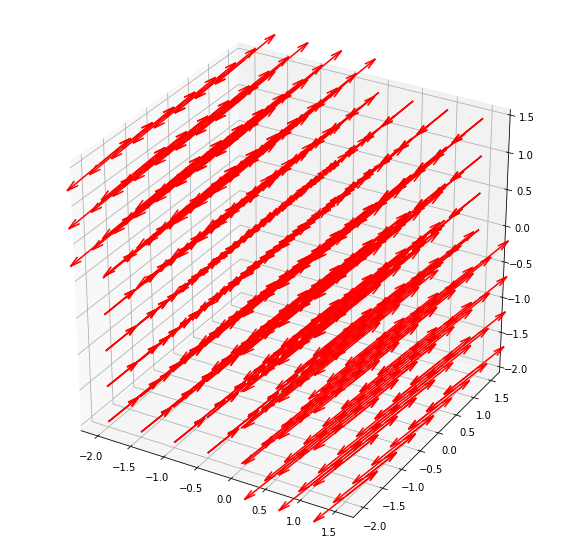

In [18]:
ax = plt.figure(figsize = (10,10)).add_subplot(projection = "3d")

# ======= prelims ======== # 
h1 = np.arange(-2, 2, 0.5)
h2 = np.arange(-2, 2, 0.5)
h3 = np.arange(-2, 2, 0.5)
h1_h2_h3 = list(itertools.product(h1,h2,h3))
# ==============================================

N = 3 #number of neurons
h = np.random.normal(1, 1, size=(N, 1)) #internal states of the neurons (i.e., firing activity of neurons)

#W, weight connectivity matrix (sampled from N(u, 1/N))
W = np.random.normal(0, 1/N, size=(N, N))

#vectorize sigmoid non-linearity
k = 10 ** 6
sigmoid = lambda x: 1/ (1 + np.exp(-2*k * x))
sigmoid_func = np.vectorize(sigmoid)

#J, connectivity matrix
J = np.random.normal(0, 1/N, size=(N, N))

#vectorize tanh nonlinearity
gain = -1
tanh = lambda x: np.tanh(gain*x)
tanh_func = np.vectorize(tanh)

#====== parameters ==============# 
bias =np.zeros(shape = (N,1))
G =  1

sigma = sigmoid_func(W @ tanh_func(h) + bias)

Na = len(np.where(sigma >= 1)[0]) #active neurons 
Nf = N - Na #frozen neurons


r = Na*(np.ones(shape = (N,1)) - sigma) + G*Nf*sigma


for i in h1_h2_h3: 

    h = np.array(i)
    dh_dt = np.multiply(sigma, -h + J@np.multiply(tanh_func(h),r))
    
    
    ax.quiver(i[0], i[1], i[2], dh_dt[0], dh_dt[1], dh_dt[2], normalize = True, length = 0.5, color = 'r')
    #ax.xlabel('$x$')
    #ax.ylabel('$y$')


## Let's examine the spectrum of the Jacobian (for n = 3)

In [24]:
#let's define our symbols
from sympy import tanh

J11, J12, J13 =  symbols("J11"), symbols("J12"), symbols("J13")
J21, J22, J23 = symbols("J21"), symbols("J22"), symbols("J23")
J31, J32, J33 = symbols("J31"), symbols("J32"), symbols("J33")

W11, W12, W13 =  symbols("W11"), symbols("W12"), symbols("W13")
W21, W22, W23 = symbols("W21"), symbols("W22"), symbols("W23")
W31, W32, W33 = symbols("W31"), symbols("W32"), symbols("W33")

a, g = symbols("a"), symbols("g")
h1, h2, h3 = symbols("h1"), symbols("h2"), symbols("h3")
b1, b2, b3 = symbols("b1"), symbols("b2"), symbols("b3")
r1, r2, r3 = symbols("b1"), symbols("b2"), symbols("b3")

In [25]:

X = Matrix([(-h1 + J11*r1*tanh(g*h1) + J12*r2*tanh(g*h2) + J13*r3*tanh(g*h3))/(1 + exp(-a*(W11*h1 + W12*h2 + W13*h3+b1))),
           (-h2 + J21*r1*tanh(g*h1) + J22*r2*tanh(g*h2) + J23*r3*tanh(g*h3))/(1 + exp(-a*(W21*h1 + W22*h2 + W23*h3+b2))),
           (-h3 + J31*r1*tanh(g*h1) + J32*r2*tanh(g*h2) + J33*r3*tanh(g*h3))/(1 + exp(-a*(W31*h1 + W32*h2 + W33*h3+b3)))])
Y = Matrix([h1, h2, h3])


In [26]:
jacobian = X.jacobian(Y)

In [27]:
jacobian

Matrix([
[W11*a*(J11*b1*tanh(g*h1) + J12*b2*tanh(g*h2) + J13*b3*tanh(g*h3) - h1)*exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1))/(1 + exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1)))**2 + (J11*b1*g*(1 - tanh(g*h1)**2) - 1)/(1 + exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1))),       J12*b2*g*(1 - tanh(g*h2)**2)/(1 + exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1))) + W12*a*(J11*b1*tanh(g*h1) + J12*b2*tanh(g*h2) + J13*b3*tanh(g*h3) - h1)*exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1))/(1 + exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1)))**2,       J13*b3*g*(1 - tanh(g*h3)**2)/(1 + exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1))) + W13*a*(J11*b1*tanh(g*h1) + J12*b2*tanh(g*h2) + J13*b3*tanh(g*h3) - h1)*exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1))/(1 + exp(-a*(W11*h1 + W12*h2 + W13*h3 + b1)))**2],
[      J21*b1*g*(1 - tanh(g*h1)**2)/(1 + exp(-a*(W21*h1 + W22*h2 + W23*h3 + b2))) + W21*a*(J21*b1*tanh(g*h1) + J22*b2*tanh(g*h2) + J23*b3*tanh(g*h3) - h2)*exp(-a*(W21*h1 + W22*h2 + W23*h3 + b2))/(1 + exp(-a*(W21*h1 + W22*h2 + W23*h3 + b2)))**2, W22*a*(J21*b

In [49]:
sigma = sigmoid_func(W @ tanh_func(h))

Na = len(np.where(sigma >= 1)[0]) #active neurons 
Nf = N - Na #frozen neurons


r = Na*(np.ones(shape = (N,1)) - sigma) + G*Nf*sigma

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

array([1., 1., 1.])